# Cancer Dataset

### Aim

* Predict the presence of breast cancer from breast cancer dataset within scikit learn

### Import Libraries

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import xgboost as xgb

from mpl_toolkits.mplot3d import Axes3D

import math

### Pipeline 

1. Import data
2. Exploratory data analysis
3. Data pre-processing
4. Feature engineering
5. Model preparation
    * train-test split
    * balancing dataset
6. Model build
    * model 1
7. Model evaluation
8. Feature importance

### Import Data

In [41]:
# Import data 

df_train = pd.read_csv('breast-cancer.csv')

In [42]:
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [43]:
df_train.shape

(569, 32)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
df_train.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [46]:
df_train.describe().round(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,3.037183e+07,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,1.250206e+08,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8.670000e+03,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,8.692180e+05,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,9.060240e+05,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8.813129e+06,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,9.113205e+08,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

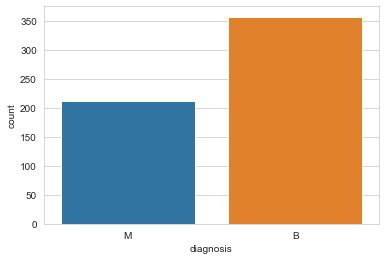

In [47]:
sns.countplot(x=df_train["diagnosis"])

In [48]:
df_train.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

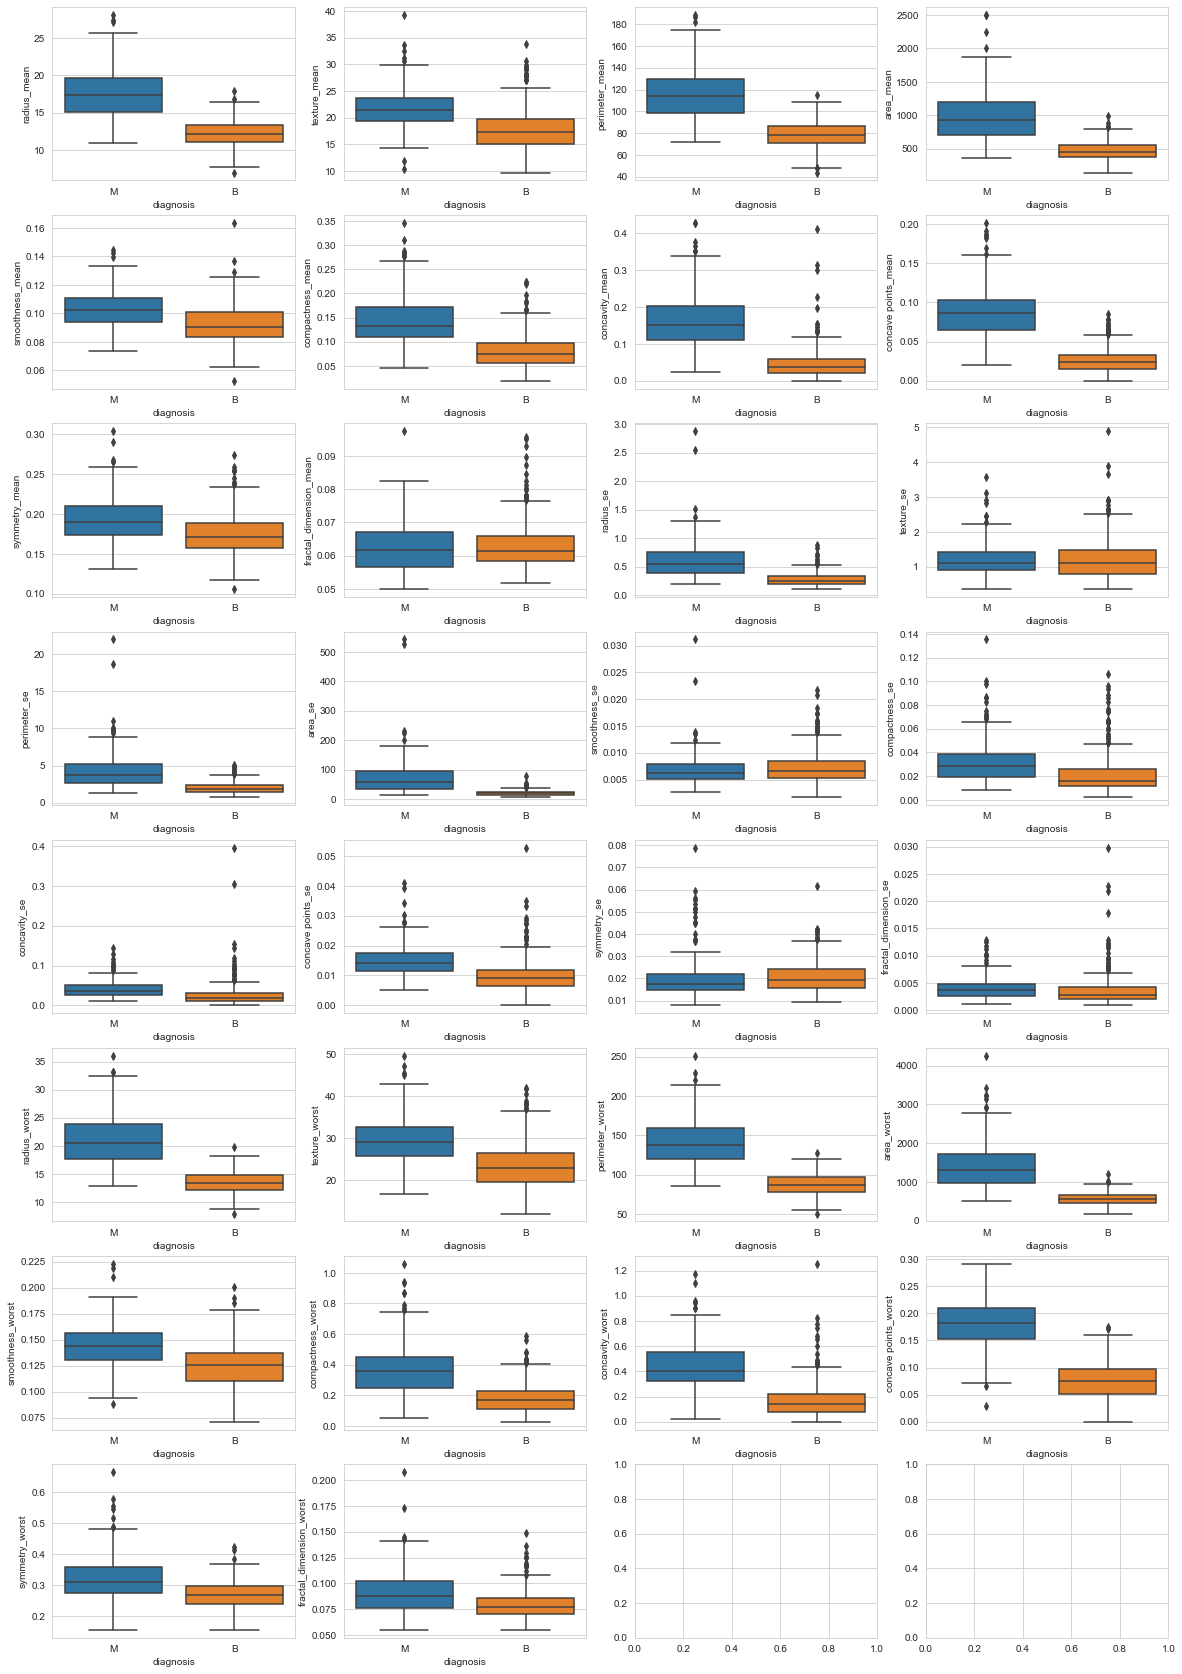

In [49]:
# Creating subplot axes
fig1, axes = plt.subplots(8,4,figsize=(20,30))
cols = [ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
# Iterating through axes and names
for name, ax in zip(cols, axes.flatten()):
    sns.boxplot(y=name, x= 'diagnosis', data=df_train, orient='v', ax=ax)

<AxesSubplot:>

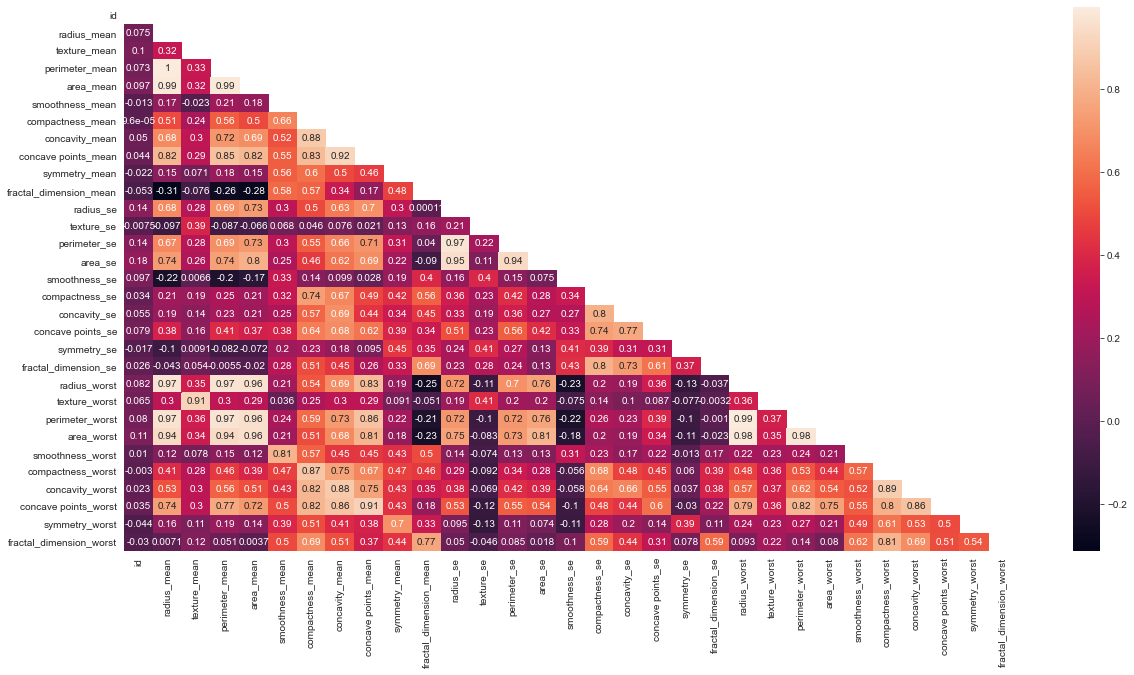

In [50]:
fig, ax = plt.subplots(figsize=(20, 10)) 
mask = np.zeros_like(df_train.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_train.corr(), mask= mask, ax= ax, annot= True)

### Model Preparation

In [51]:
df_train.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [59]:
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_train['diagnosis']= label_encoder.fit_transform(df_train['diagnosis'])
  
df_train['diagnosis'].unique()

array([1, 0], dtype=int64)

In [60]:
#Separating the dataset in x which are the features and y which is the label
feature_names=[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = df_train[feature_names].values
y = df_train[['diagnosis']].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [74]:
np.shape(y_test)

(114, 1)

### Model Build

#### XG Boost

In [124]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[69  2]
 [ 3 40]]


In [125]:
xgb_model_predict_probs = xgb_model.predict_proba(X_test)

In [126]:
np.shape(xgb_model_predict_probs)

(114, 2)

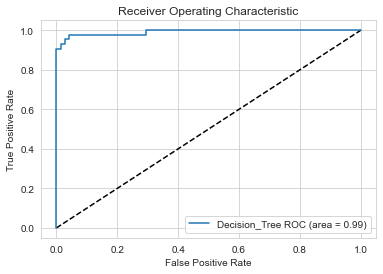

In [127]:
# Compute False postive rate, and True positive rate
fpr1 , tpr1, thresholds1 = roc_curve(y_test, xgb_model_predict_probs[:,1])

# Calculate Area under the curve to display on the plot
roc_auc = roc_auc_score(y_test, xgb_model_predict_probs[:,1])

# Now, plot the computed values
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= '%s ROC (area = %0.2f)' % ("Decision_Tree", roc_auc)) #"XGBoost Aki")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [128]:
fpr1

array([0.        , 0.        , 0.        , 0.01408451, 0.01408451,
       0.02816901, 0.02816901, 0.04225352, 0.04225352, 0.29577465,
       0.29577465, 1.        ])

In [129]:
np.shape(fpr1)

(12,)

In [130]:
thresholds1

array([1.9998373e+00, 9.9983728e-01, 9.4367653e-01, 8.0247235e-01,
       7.9461461e-01, 5.7521099e-01, 2.1434847e-01, 1.6900605e-01,
       7.9987206e-02, 3.3552069e-03, 3.1388020e-03, 8.1108432e-05],
      dtype=float32)

#### SVM

In [131]:
model = SVC(probability=True)
model.fit(X_train,y_train)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [132]:
#this default predict function uses a threshold of 0.5
y_pred = model.predict(X_test)

In [139]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [172]:
y_test.T

array([[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1]], dtype=int64)

In [133]:
print(confusion_matrix(y_test, y_pred))

[[71  0]
 [ 6 37]]


In [168]:
svm_model_predict_probs = model.predict_proba(X_test)

In [169]:
y_pred_probs=svm_model_predict_probs[:,1]

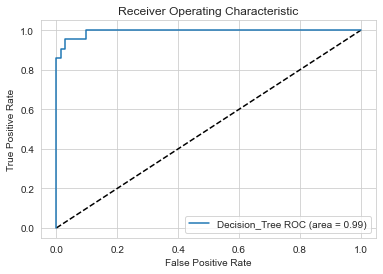

In [157]:
# Compute False postive rate, and True positive rate
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_probs)

# Calculate Area under the curve to display on the plot
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Now, plot the computed values
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= '%s ROC (area = %0.2f)' % ("Decision_Tree", roc_auc)) #"XGBoost Aki")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

Text(0.5, 1.0, 'Precision-Recall Curve')

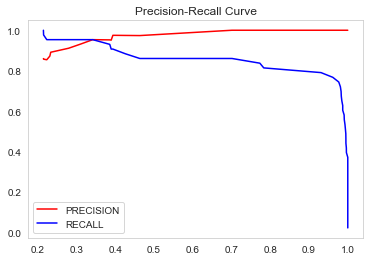

In [158]:
# Plot Precision-Recall curve using sklearn. 

from sklearn.metrics import precision_recall_curve 

precision, recall, threshold = precision_recall_curve(y_test, y_pred_probs) 

  
# Plot the output. 

plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION') 

plt.plot(threshold, recall[:-1], c ='b', label ='RECALL') 
plt.grid() 
plt.legend() 

plt.title('Precision-Recall Curve')

In [179]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.1)
# evaluate each threshold
recall_scores = [f1_score(y_test, to_labels(y_pred_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(recall_scores)
print('Threshold=%.3f, F1 Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.300, F1 Score=0.95349


In [174]:
recall_score(y_pred,y_test)

1.0

In [175]:
recall_scores

[1.0,
 1.0,
 1.0,
 0.9534883720930233,
 0.8837209302325582,
 0.8604651162790697,
 0.8604651162790697,
 0.8604651162790697,
 0.7906976744186046,
 0.7906976744186046]

In [173]:
y_pred_probs

array([0.14742512, 0.99999956, 0.98088913, 0.03185748, 0.02704436,
       0.99999864, 0.9999817 , 0.98695418, 0.06454789, 0.14854126,
       0.07394918, 0.99271505, 0.23088542, 0.77300109, 0.04993078,
       0.99096793, 0.18536348, 0.02208052, 0.03641036, 0.99999791,
       0.39363501, 0.05417996, 0.99999446, 0.0270891 , 0.02976347,
       0.05167851, 0.0643213 , 0.0224421 , 0.05188358, 0.99999977,
       0.02676272, 0.04041801, 0.03182428, 0.27941424, 0.02584191,
       0.03970961, 0.97669479, 0.04663471, 0.99999902, 0.31053316,
       0.02693183, 0.93082469, 0.03034805, 0.05190009, 0.0262353 ,
       0.04752065, 0.02795206, 0.02699796, 0.05779053, 0.05591826,
       0.99999464, 0.99999928, 0.08166996, 0.07449129, 0.0358701 ,
       0.13071765, 0.02651139, 0.98465077, 0.21475294, 0.02900604,
       0.07401606, 0.99999862, 0.99999133, 0.15735535, 0.04241247,
       0.07946988, 0.99518001, 0.99999638, 0.03066398, 0.08187992,
       0.38553007, 0.99646284, 0.09847523, 0.78313204, 0.03492

In [152]:
recall_scores

[1.0,
 1.0,
 1.0,
 0.9534883720930233,
 0.8837209302325582,
 0.8604651162790697,
 0.8604651162790697,
 0.8604651162790697,
 0.7906976744186046,
 0.7906976744186046]

In [150]:
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [180]:
y_pred_new=[]
for i in y_pred_probs:
    print('Probability for this patient being cancerous is: ', i)
    if i>=0.3:
        y_pred_new.append(1)
        print('Class assigned is: ', 1)
    else:
        y_pred_new.append(0)
        print('Class assigned is: ', 0)

Probability for this patient being cancerous is:  0.14742511657161503
Class assigned is:  0
Probability for this patient being cancerous is:  0.9999995645762173
Class assigned is:  1
Probability for this patient being cancerous is:  0.9808891331629591
Class assigned is:  1
Probability for this patient being cancerous is:  0.03185748485613849
Class assigned is:  0
Probability for this patient being cancerous is:  0.02704435545640744
Class assigned is:  0
Probability for this patient being cancerous is:  0.9999986399768522
Class assigned is:  1
Probability for this patient being cancerous is:  0.9999816993044791
Class assigned is:  1
Probability for this patient being cancerous is:  0.9869541842541908
Class assigned is:  1
Probability for this patient being cancerous is:  0.06454788569783777
Class assigned is:  0
Probability for this patient being cancerous is:  0.1485412583396783
Class assigned is:  0
Probability for this patient being cancerous is:  0.07394918373130349
Class assigned i

In [181]:
cmII=confusion_matrix(y_test,y_pred_new)

In [182]:
cmII

array([[68,  3],
       [ 2, 41]], dtype=int64)

## Example on Imbalanced Classification

In [204]:
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


from matplotlib import pyplot

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.50], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [205]:
y_pred=model.predict(testX)

In [206]:
cm=confusion_matrix(testy,y_pred)
cm

array([[2327,  173],
       [ 181, 2319]], dtype=int64)

In [207]:
accuracy_score(testy,y_pred)

0.9292

In [208]:
precision_score(testy,y_pred)

0.930577849117175

In [209]:
recall_score(testy,y_pred)

0.9276

Best Threshold=0.002219, Recall-Score=0.071


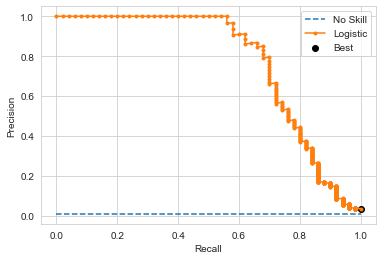

In [198]:
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(testy, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(recall)
print('Best Threshold=%f, Recall-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [199]:
y_pred_new=[]
for i in yhat:
    print('Probability for this patient being cancerous is: ', i)
    if i>=0.002219:
        y_pred_new.append(1)
        print('Class assigned is: ', 1)
    else:
        y_pred_new.append(0)
        print('Class assigned is: ', 0)

Probability for this patient being cancerous is:  0.007241297209540253
Class assigned is:  1
Probability for this patient being cancerous is:  0.0035044897425097203
Class assigned is:  1
Probability for this patient being cancerous is:  0.00013243377452828404
Class assigned is:  0
Probability for this patient being cancerous is:  9.407824650070768e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.00016766171485177697
Class assigned is:  0
Probability for this patient being cancerous is:  0.9981206182446474
Class assigned is:  1
Probability for this patient being cancerous is:  0.0019610610042833853
Class assigned is:  0
Probability for this patient being cancerous is:  9.374808418062506e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.0003030972238351214
Class assigned is:  0
Probability for this patient being cancerous is:  7.632080324097525e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.0004623568

Probability for this patient being cancerous is:  0.006876137797977261
Class assigned is:  1
Probability for this patient being cancerous is:  0.0008721402090526899
Class assigned is:  0
Probability for this patient being cancerous is:  0.0003281800224706901
Class assigned is:  0
Probability for this patient being cancerous is:  2.0643561272263525e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.00039048764917864716
Class assigned is:  0
Probability for this patient being cancerous is:  0.00015852839137062743
Class assigned is:  0
Probability for this patient being cancerous is:  0.011573193023077237
Class assigned is:  1
Probability for this patient being cancerous is:  0.000760941279676667
Class assigned is:  0
Probability for this patient being cancerous is:  0.003717008354952093
Class assigned is:  1
Probability for this patient being cancerous is:  0.0013593999537613649
Class assigned is:  0
Probability for this patient being cancerous is:  6.763757141

Class assigned is:  0
Probability for this patient being cancerous is:  0.0006034830240670047
Class assigned is:  0
Probability for this patient being cancerous is:  0.0008042703473783586
Class assigned is:  0
Probability for this patient being cancerous is:  0.00020551578255240398
Class assigned is:  0
Probability for this patient being cancerous is:  0.09553303671082308
Class assigned is:  1
Probability for this patient being cancerous is:  0.0019492661971308983
Class assigned is:  0
Probability for this patient being cancerous is:  0.001802133642433004
Class assigned is:  0
Probability for this patient being cancerous is:  0.0003097129390936337
Class assigned is:  0
Probability for this patient being cancerous is:  0.0007196387655909002
Class assigned is:  0
Probability for this patient being cancerous is:  0.007049082065136011
Class assigned is:  1
Probability for this patient being cancerous is:  0.00043392014541917905
Class assigned is:  0
Probability for this patient being cance

Probability for this patient being cancerous is:  2.7542845680550078e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.0005476739449870991
Class assigned is:  0
Probability for this patient being cancerous is:  0.001957011221063613
Class assigned is:  0
Probability for this patient being cancerous is:  0.00022671134727838058
Class assigned is:  0
Probability for this patient being cancerous is:  0.03070606369893541
Class assigned is:  1
Probability for this patient being cancerous is:  0.00023150414435705994
Class assigned is:  0
Probability for this patient being cancerous is:  7.342221403996865e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.00201961309293715
Class assigned is:  0
Probability for this patient being cancerous is:  0.00020493200858872411
Class assigned is:  0
Probability for this patient being cancerous is:  0.00012847574192737256
Class assigned is:  0
Probability for this patient being cancerous is:  0.00543982

Class assigned is:  0
Probability for this patient being cancerous is:  0.00038510769164688667
Class assigned is:  0
Probability for this patient being cancerous is:  0.00041070715874334996
Class assigned is:  0
Probability for this patient being cancerous is:  0.0004342221354499319
Class assigned is:  0
Probability for this patient being cancerous is:  0.00683085546602212
Class assigned is:  1
Probability for this patient being cancerous is:  0.0005502947262030954
Class assigned is:  0
Probability for this patient being cancerous is:  0.00010129864747935117
Class assigned is:  0
Probability for this patient being cancerous is:  0.004097914292376847
Class assigned is:  1
Probability for this patient being cancerous is:  7.032455626527087e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.005083067797429323
Class assigned is:  1
Probability for this patient being cancerous is:  0.0011553006549413364
Class assigned is:  0
Probability for this patient being canc

Class assigned is:  0
Probability for this patient being cancerous is:  0.0009118665672681429
Class assigned is:  0
Probability for this patient being cancerous is:  0.0013467771499489345
Class assigned is:  0
Probability for this patient being cancerous is:  0.004346665508572128
Class assigned is:  1
Probability for this patient being cancerous is:  0.00041872240490631313
Class assigned is:  0
Probability for this patient being cancerous is:  0.0020803090423107684
Class assigned is:  0
Probability for this patient being cancerous is:  0.0005184069652636042
Class assigned is:  0
Probability for this patient being cancerous is:  2.2323745366995694e-05
Class assigned is:  0
Probability for this patient being cancerous is:  2.809237211403008e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.00010541661961312598
Class assigned is:  0
Probability for this patient being cancerous is:  0.0005206439345156295
Class assigned is:  0
Probability for this patient being c

Class assigned is:  1
Probability for this patient being cancerous is:  2.170573185315984e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.0001983475688044399
Class assigned is:  0
Probability for this patient being cancerous is:  0.00037264593838020216
Class assigned is:  0
Probability for this patient being cancerous is:  0.00023393390229211567
Class assigned is:  0
Probability for this patient being cancerous is:  0.008301385133033426
Class assigned is:  1
Probability for this patient being cancerous is:  0.0007117771399278049
Class assigned is:  0
Probability for this patient being cancerous is:  1.1995633579646795e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.0006131403090848313
Class assigned is:  0
Probability for this patient being cancerous is:  0.0003616541581850336
Class assigned is:  0
Probability for this patient being cancerous is:  0.002126962072905511
Class assigned is:  0
Probability for this patient being ca

Probability for this patient being cancerous is:  0.0008951171534928471
Class assigned is:  0
Probability for this patient being cancerous is:  0.00010698645789057102
Class assigned is:  0
Probability for this patient being cancerous is:  0.002765654285235485
Class assigned is:  1
Probability for this patient being cancerous is:  0.0038793166745667513
Class assigned is:  1
Probability for this patient being cancerous is:  0.0002011296200690377
Class assigned is:  0
Probability for this patient being cancerous is:  0.00029831504983551506
Class assigned is:  0
Probability for this patient being cancerous is:  0.009613784202320329
Class assigned is:  1
Probability for this patient being cancerous is:  4.192425515421783e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.007567633987057816
Class assigned is:  1
Probability for this patient being cancerous is:  0.0031866146414100305
Class assigned is:  1
Probability for this patient being cancerous is:  0.000486804

Class assigned is:  1
Probability for this patient being cancerous is:  1.5237917987074997e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.0035973236286495655
Class assigned is:  1
Probability for this patient being cancerous is:  0.003294807043799261
Class assigned is:  1
Probability for this patient being cancerous is:  0.0041903382484651175
Class assigned is:  1
Probability for this patient being cancerous is:  0.00017229074790813925
Class assigned is:  0
Probability for this patient being cancerous is:  0.0005385184404921501
Class assigned is:  0
Probability for this patient being cancerous is:  0.0001641927789825314
Class assigned is:  0
Probability for this patient being cancerous is:  0.0044637387860408705
Class assigned is:  1
Probability for this patient being cancerous is:  0.0003114165383048269
Class assigned is:  0
Probability for this patient being cancerous is:  0.001461469782412715
Class assigned is:  0
Probability for this patient being can

Probability for this patient being cancerous is:  0.00042219826075473826
Class assigned is:  0
Probability for this patient being cancerous is:  1.6029390178253932e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.0008960211928371808
Class assigned is:  0
Probability for this patient being cancerous is:  9.394862603215143e-05
Class assigned is:  0
Probability for this patient being cancerous is:  0.00018264995911444705
Class assigned is:  0
Probability for this patient being cancerous is:  0.013849395090040531
Class assigned is:  1
Probability for this patient being cancerous is:  0.0006586567343405072
Class assigned is:  0
Probability for this patient being cancerous is:  0.000161880236827512
Class assigned is:  0
Probability for this patient being cancerous is:  0.0017593475128388095
Class assigned is:  0
Probability for this patient being cancerous is:  0.020472729353843096
Class assigned is:  1
Probability for this patient being cancerous is:  0.00257618

In [200]:
cm_new=confusion_matrix(testy,y_pred_new)
cm_new

array([[3637, 1313],
       [   0,   50]], dtype=int64)

In [201]:
precision_score(testy,y_pred_new)

0.036683785766691124

In [202]:
recall_score(testy,y_pred_new)

1.0

In [203]:
f1_score(testy,y_pred_new)

0.07077140835102619